<h1>Ejercicio 1 del Trabajo practico</h1>
<h2>Participantes:</h2>
<h3>Mateo Rovere</h3>
<h3>Valentin Dalmau</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean

Parte 1:

In [3]:
df = pd.read_csv("provicias_datos_2022.csv", sep=";")
df1 = df.tail(-3)
df1.columns = df.iloc[2]
df1.reset_index(inplace=True, drop=True)
df1.columns.name = None

In [4]:
df1['hogares (miles)'] = df1['hogares (miles)'].astype(float)
df1['población (miles)'] = df1['población (miles)'].astype(float)
df1['ingresos laborales (miles pesos)'] = df1['ingresos laborales (miles pesos)'].str.replace('.', '')
df1['ingresos laborales (miles pesos)'] = df1['ingresos laborales (miles pesos)'].astype(float)
df1['tasa de empleo (%)'] = df1['tasa de empleo (%)'].str.replace(',', '.')
df1['tasa de empleo (%)'] = df1['tasa de empleo (%)'].astype(float)
#df1.index.name = "index"


C:\Users\rover\AppData\Local\Temp\ipykernel_7604\2785766286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hogares (miles)'] = df1['hogares (miles)'].astype(float)
C:\Users\rover\AppData\Local\Temp\ipykernel_7604\2785766286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['población (miles)'] = df1['población (miles)'].astype(float)
C:\Users\rover\AppData\Local\Temp\ipykernel_7604\2785766286.py:3: FutureWarning: The default value of regex will change from True to False in a future version. 

In [5]:
#para imputar la población de san luis, vamos a calcular la media de personas por hogar en cada provincia,
#y despues con ese dato vamos a sacar la poblacion esperada de san luis

mask = df1["población (miles)"] < 150
df1.loc[mask, "población (miles)"] = df1.loc[mask,"población (miles)"] * 1000

mask2 = df1['hogares (miles)'] < 55
df1.loc[mask2, 'hogares (miles)'] = df1.loc[mask2,'hogares (miles)'] * 1000

df1["personas_por_hogar"] = df1["población (miles)"]/df1['hogares (miles)']
personas_por_hogar_media = df1["personas_por_hogar"].mean()
media_san_luis = personas_por_hogar_media * df1.loc[18]['hogares (miles)']
df1.at[18, 'población (miles)'] =  int(media_san_luis)
df1.at[18,"personas_por_hogar"] = personas_por_hogar_media

C:\Users\rover\AppData\Local\Temp\ipykernel_7604\3092395606.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["personas_por_hogar"] = df1["población (miles)"]/df1['hogares (miles)']


In [6]:
#para poder imputar los ingresos laborales de Rio Negro optamos por la mediana
#ya que no es facilmente influenciada por los valores atipicos

df1["prom_salario_prov"] = df1["ingresos laborales (miles pesos)"] / df1["población (miles)"]
mediana_salarial = df1["prom_salario_prov"].median()
df1.at[15, 'ingresos laborales (miles pesos)'] =  int(mediana_salarial) * df1.loc[15,"población (miles)"]
df1.at[15,"prom_salario_prov"] = mediana_salarial

C:\Users\rover\AppData\Local\Temp\ipykernel_7604\1389675389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["prom_salario_prov"] = df1["ingresos laborales (miles pesos)"] / df1["población (miles)"]


In [7]:
#en la columna de tasa de empleo, hay un error ya que se presenta el valor de 110% de empleo en la provincia de Tierra Del Fuego,
#lo cual es completamente ilogico, entonces decidimos remplazar ese valor por la media truncada, 
#optamos por esta medida gracias a la facilidad de resolucion, en 2 lineas lo conseguimos resolver, 
#y la diferencia con respecto a hacer la media sacando unicamente el 110 era despreciable
media_empleo_truncada = round(trim_mean(df1["tasa de empleo (%)"],0.05),1)
df1.at[23,"tasa de empleo (%)"] = media_empleo_truncada
df1

,PROVINCIa,población (miles),hogares (miles),ingresos laborales (miles pesos),tasa de empleo (%),superficie (km2),exportaciones (mill usd),personas_por_hogar,prom_salario_prov
0,Ciudad Autónoma de Buenos Aires,3004.0,1263.0,211877384.0,4.7,"205,9","311,163",2.378464,70531.752330
1,Buenos Aires,17292.0,5738.0,623250917.0,8.7,"305.907,40","33024,657",3.013594,36042.731726
2,Catamarca,336.0,102.0,8460986.0,7.3,"101.486,10","201,03",3.294118,25181.505952
3,Chaco,3477.0,1251.0,122790341.0,6.5,"99.763,30","516,336",2.779376,35315.024734
4,Chubut,967.0,287.0,24733558.0,5.3,"224.302,30","2575,372",3.369338,25577.619442
5,Córdoba,1044.0,321.0,22744468.0,2.6,"164.707,80","12851,979",3.252336,21785.888889
6,Corrientes,591.0,205.0,30606036.0,3.6,"89.123,30","273,185",2.882927,51786.862944
7,Entre Ríos,1252.0,431.0,40510249.0,6.4,"78.383,70","1911,902",2.904872,32356.428914
8,Formosa,509.0,148.0,9586123.0,3.3,"75.488,30","40,614",3.439189,18833.247544
9,Jujuy,696.0,197.0,17044750.0,5.1,"53.244,20","873,44",3.532995,24489.583333


Parte 2:

C:\Users\rover\AppData\Local\Temp\ipykernel_7604\3238813197.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


<Axes: >

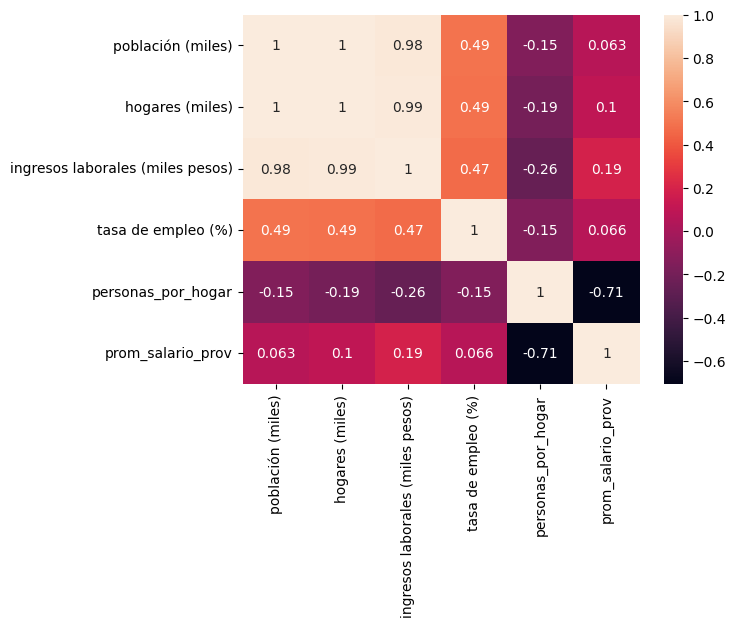

In [8]:
sns.heatmap(df1.corr(), annot=True)

<BarContainer object of 24 artists>

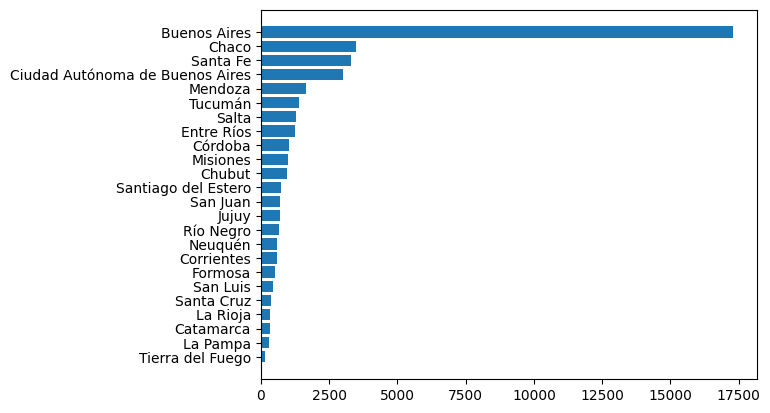

In [9]:
df1_ordenado = df1.sort_values("población (miles)", ascending=True)
plt.barh(df1_ordenado["PROVINCIa"],df1_ordenado["población (miles)"])

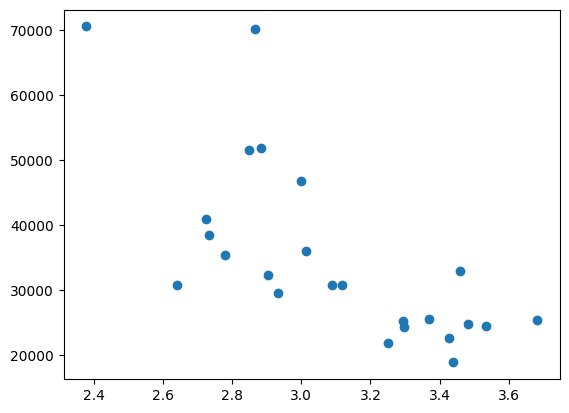

In [10]:
plt.scatter(x=df1["personas_por_hogar"],y=df1["prom_salario_prov"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24ee90b8310>,
 'caps': [<matplotlib.lines.Line2D at 0x24ee90b8850>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ee90b8070>],
 'medians': [<matplotlib.lines.Line2D at 0x24ee90b8d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ee90c7070>],
 'means': []}

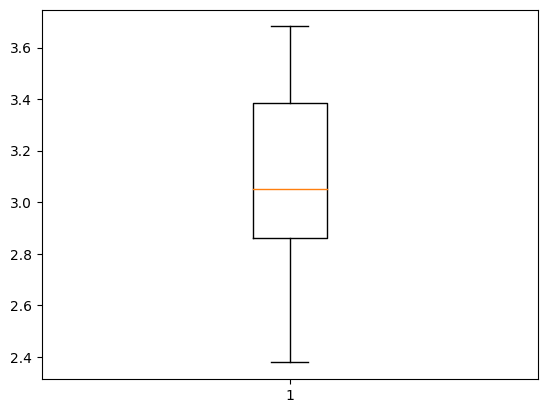

In [11]:
plt.boxplot(df1['personas_por_hogar'])

Parte 3:

Promedio salarial y cantidad de personas por hogar (correlación negativa):
Se observa una correlación negativa significativa entre el promedio salarial y la cantidad de personas por hogar en las provincias de Argentina. Esto implica que a medida que el promedio salarial aumenta, la cantidad de personas por hogar tiende a disminuir. Es decir, en las provincias que tiene gente con salarios mas altos, es mas común que haya menos personas viviendo en cada hogar.<br>

Tasa de desempleo y población:
Se encuentra una correlación positiva entre la tasa de desempleo y la población en las provincias de Argentina. Osea que a medida que la población aumenta, también tiende a incrementarse la tasa de desempleo. Cabe destacar que esta correlación no implica necesariamente una relación causal, ya que pueden existir otros factores que influyen en la tasa de desempleo.<br>

Población e ingresos totales:
Se encuentra una correlación positiva entre la población y los ingresos totales en las provincias de Argentina. Esto es bastante obvio ya que a mayor poblacion va a haber mas gente trabajando, por ende mayores ingresos totales

Parte 4:

Informe sobre el proceso de manipulación y limpieza de datos en un DataFrame de provincias de Argentina:<br>

Eliminación de filas erróneas: Inicialmente se identificaron tres filas en el DataFrame que presentaban errores de diseño y no contenían datos válidos. Estas filas fueron removidas utilizando la función tail para obtener las últimas filas del DataFrame.<br>

Reorganización de columnas y reinicio del índice: Se procedió a reorganizar las columnas del DataFrame para asegurar un orden coherente de los datos. Posteriormente, se reseteó el índice del DataFrame para que volviera a comenzar desde 0, lo cual facilita la manipulación y el acceso a los datos.<br>

Conversión de tipos de datos: Se identificó que algunas columnas que contenían valores numéricos estaban siendo tratadas como objetos en lugar de números. Para corregir esto, se realizó la conversión de los valores numéricos a tipo float, lo cual se logró utilizando la función astype(float) en las columnas correspondientes.<br>

Reemplazo de separadores decimales: Se observó que los valores numéricos en el DataFrame utilizaban comas como separadores decimales, mientras que Python reconoce el punto como el separador decimal por defecto. Para solucionar esto, se aplicó el método replace para reemplazar las comas por puntos, permitiendo que los valores numéricos fueran interpretados correctamente por Python. Además, utilizamos la misma función para quitar todos los puntos que separaban los miles, es decir "100.000" pasó a ser "100000" para poder ser leído correctamente por python.<br>

Corrección de valores erróneos en población y cantidad de hogares: Se identificó que algunas provincias tenían valores de población y cantidad de hogares que parecían haber sido divididos por mil erróneamente. Para corregir esto, se multiplicaron por 1000 aquellos valores de población menores a 150000 y los valores de cantidad de hogares menores a 55000. Esta corrección permitió obtener cifras más realistas y coherentes con los datos de las demás provincias.<br>

Cálculo de la columna "personas por hogar" y reemplazo de valor faltante: Se creó una nueva columna denominada "personas por hogar" calculada como la división de la población entre la cantidad de hogares en cada provincia. Se observó que la provincia de San Luis presentaba un valor faltante (NaN) en la columna de población. Para solucionar esto, se calculó la media de "personas por hogar" en todas las provincias y se multiplicó este valor por la cantidad de hogares en San Luis, obteniendo así una estimación de la población en esa provincia.<br>

Imputación de valor faltante en ingresos laborales: Se detectó que la provincia de Río Negro tenía un valor faltante (NaN) en la columna de ingresos laborales. Para imputar este valor, se calculó la mediana de los ingresos laborales en todas las provincias y se asignó este valor a Río Negro, asegurando así la integridad de los datos y evitando distorsiones en el análisis posterior.<br>

Corrección de dato erróneo en tasa de desempleo: Se identificó que la provincia de Tierra del Fuego tenía un valor de tasa de desempleo del 110%, lo cual claramente era un error. Para corregir este dato, se calculó la media truncada de la tasa de desempleo en todas las provincias y se utilizó este valor para reemplazar el dato erróneo en Tierra del Fuego. Esta corrección permite mantener la coherencia de los datos y evitar distorsiones en el análisis.<br>

En resumen, el proceso de manipulación y limpieza de datos en el DataFrame de provincias de Argentina incluyó la eliminación de filas erróneas, la reorganización de columnas, la conversión de tipos de datos, el reemplazo de separadores decimales, la corrección de valores erróneos en población y cantidad de hogares, el cálculo de una nueva columna "personas por hogar", la imputación de valores faltantes en ingresos laborales y la corrección de un dato erróneo en la tasa de desempleo. Estas acciones permiten obtener un conjunto de datos coherentes y preparados para análisis posteriores.<br>

In [ ]:
df1.to_parquet('TP1_EJ1_Mateo_Rovere_Valentin_Dalmau')

In [12]:
pd.read_parquet('TP1_EJ1_Mateo_Rovere_Valentin_Dalmau')

,PROVINCIa,población (miles),hogares (miles),ingresos laborales (miles pesos),tasa de empleo (%),superficie (km2),exportaciones (mill usd),personas_por_hogar,prom_salario_prov
0,Ciudad Autónoma de Buenos Aires,3004.0,1263.0,211877384.0,4.7,"205,9","311,163",2.378464,70531.752330
1,Buenos Aires,17292.0,5738.0,623250917.0,8.7,"305.907,40","33024,657",3.013594,36042.731726
2,Catamarca,336.0,102.0,8460986.0,7.3,"101.486,10","201,03",3.294118,25181.505952
3,Chaco,3477.0,1251.0,122790341.0,6.5,"99.763,30","516,336",2.779376,35315.024734
4,Chubut,967.0,287.0,24733558.0,5.3,"224.302,30","2575,372",3.369338,25577.619442
5,Córdoba,1044.0,321.0,22744468.0,2.6,"164.707,80","12851,979",3.252336,21785.888889
6,Corrientes,591.0,205.0,30606036.0,3.6,"89.123,30","273,185",2.882927,51786.862944
7,Entre Ríos,1252.0,431.0,40510249.0,6.4,"78.383,70","1911,902",2.904872,32356.428914
8,Formosa,509.0,148.0,9586123.0,3.3,"75.488,30","40,614",3.439189,18833.247544
9,Jujuy,696.0,197.0,17044750.0,5.1,"53.244,20","873,44",3.532995,24489.583333
